# UP 221 Final Project
## Group members: Purva Kapshikar, Hamzah Yaacob, and Jackson Zeng

In [6]:
!pip install plotly

In [5]:
pip install chart-studio

  Using cached chart_studio-1.1.0-py3-none-any.whl (64 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import contextily as cx
import plotly.express as px
import folium
import networkx as nx
import osmnx as ox
import libpysal as lps
import chart_studio
import chart_studio.plotly as py

### Highest Ridership Census Tracts

In [8]:
census_data_51a = pd.read_csv("data/51a-tract-data/tracts_data_51a.csv")
geom_data_51a = pd.read_csv("data/51a-tract-data/tracts_51A.csv")
geom_data_51a = geom_data_51a.rename(columns={"GEOID": "FIPS"})
geom_data_51a = geom_data_51a.loc[:, ["FIPS", "geometry"]]
data_51a = census_data_51a.merge(right=geom_data_51a, on="FIPS")

In [9]:
data_51a["geometry"] = gpd.GeoSeries.from_wkt(data_51a["geometry"])
data_51a = gpd.GeoDataFrame(data_51a, geometry="geometry")

In [10]:
modes = ["Drove Alone", "Carpooled", "Public Transportation (Includes Taxicab)", "Motorcycle", "Bicycle", "Walked", "Other Means"]

for i in range(7):
    data_51a = data_51a.rename(columns={"Workers 16 Years and Over: " + modes[i]: modes[i]})

In [11]:
top_5_transit_tracts = data_51a.sort_values(by="Public Transportation (Includes Taxicab)", ascending = False).head(5)

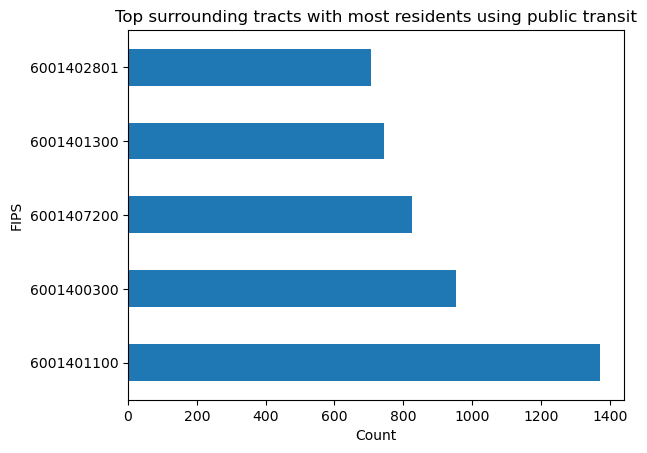

In [12]:
top_5_transit_tracts.plot.barh(x="FIPS",
                            y="Public Transportation (Includes Taxicab)",
                            xlabel="Count",
                            title="Top surrounding tracts with most residents using public transit",
                            legend=False);

In [13]:
top_5_transit_tracts['Area Name'] = top_5_transit_tracts['Area Name'].str.replace("Census Tract ", "")

In [14]:
top_5_transit_tracts_long = pd.melt(top_5_transit_tracts, id_vars='Area Name', value_vars=modes)

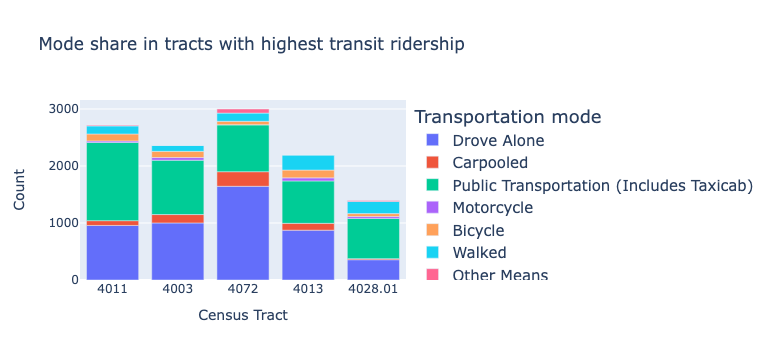

In [15]:
fig_transit_tracts = px.bar(top_5_transit_tracts_long, x="Area Name", y="value", color="variable", 
                            labels={
                                "value": "Count",
                                "variable": "Transportation mode",
                            },
                            title="Mode share in tracts with highest transit ridership")

fig_transit_tracts.update_layout(xaxis_title="Census Tract", legend=dict(font=dict(size=15)))
fig_transit_tracts.show()

## Part 3: Real-time delays

In [16]:
stops_shp_file = gpd.read_file('data/bus-stops/UniqueStops_Fall22.shp')
stops_shp_file.to_file('data/bus-stops/UniqueStops_Fall22.shp', driver='GeoJSON')

In [17]:
delays_19 = pd.read_csv('data/real-time-delays/Line 19.csv')
delays_20 = pd.read_csv('data/real-time-delays/Line 20.csv')
delays_51A = pd.read_csv('data/real-time-delays/Line 51A.csv')

In [18]:
joined_geom_data_19 = delays_19.merge(stops_shp_file, left_on='stop_code', right_on='stp_511_id', how = 'left')
joined_geom_data_20 = delays_20.merge(stops_shp_file, left_on='stop_code', right_on='stp_511_id', how = 'left')
joined_geom_data_51A = delays_51A.merge(stops_shp_file, left_on='stop_code', right_on='stp_511_id', how = 'left')

In [19]:
def filter_for_delays(geom_data):
    geom_data = geom_data[geom_data["Average Delay"] > 300]
    geom_data['lon'] = geom_data.geometry.apply(lambda p: p.x)
    geom_data['lat'] = geom_data.geometry.apply(lambda p: p.y)
    
    return geom_data

In [20]:
def generate_map(geom_data, line):
    filtered_geom_data = filter_for_delays(geom_data)
    fig = px.scatter_mapbox(
                    data_frame=filtered_geom_data,
                    lat='lat',
                    lon='lon',
                    zoom=12,
                    hover_name='stop_name',
                    hover_data=["Average Delay"],
                    mapbox_style="carto-positron")
    # options on the layout
    fig.update_layout(
        width = 800,
        height = 800,
        title='Line ' + line,
        title_x=0.5
    )
    return fig

In [25]:
username = 'pkapshikar' # your username
api_key = 'GV02Bmywj16KCb1Hf42s' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

/tmp/ipykernel_5561/2173742305.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_5561/2173742305.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



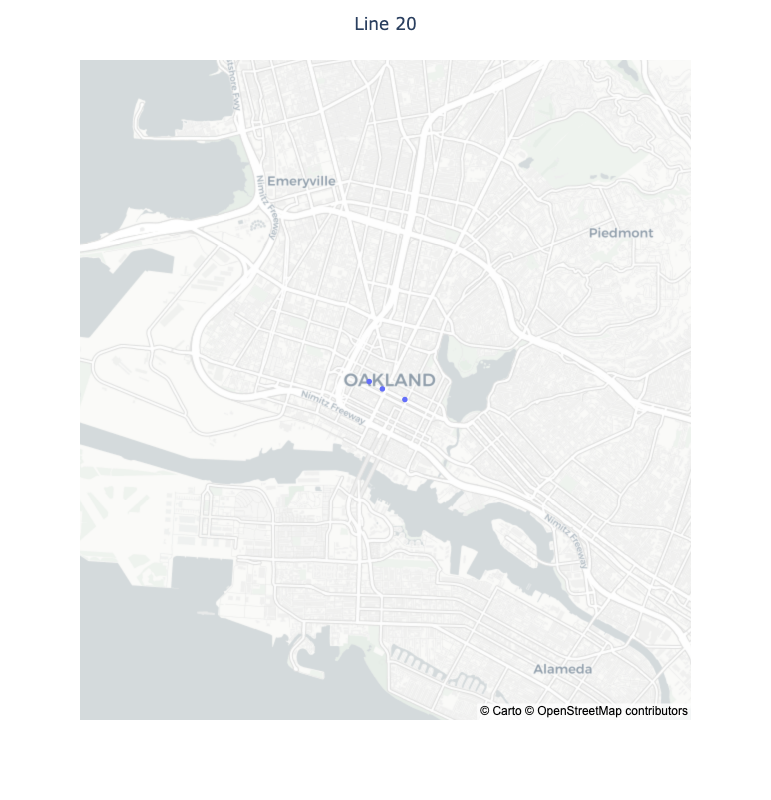

In [23]:
map_20 = generate_map(joined_geom_data_20, "20")
map_20

In [26]:
py.plot(map_20, filename = 'delays_20', auto_open=True)

PlotlyRequestError: No message

/tmp/ipykernel_5561/2173742305.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_5561/2173742305.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



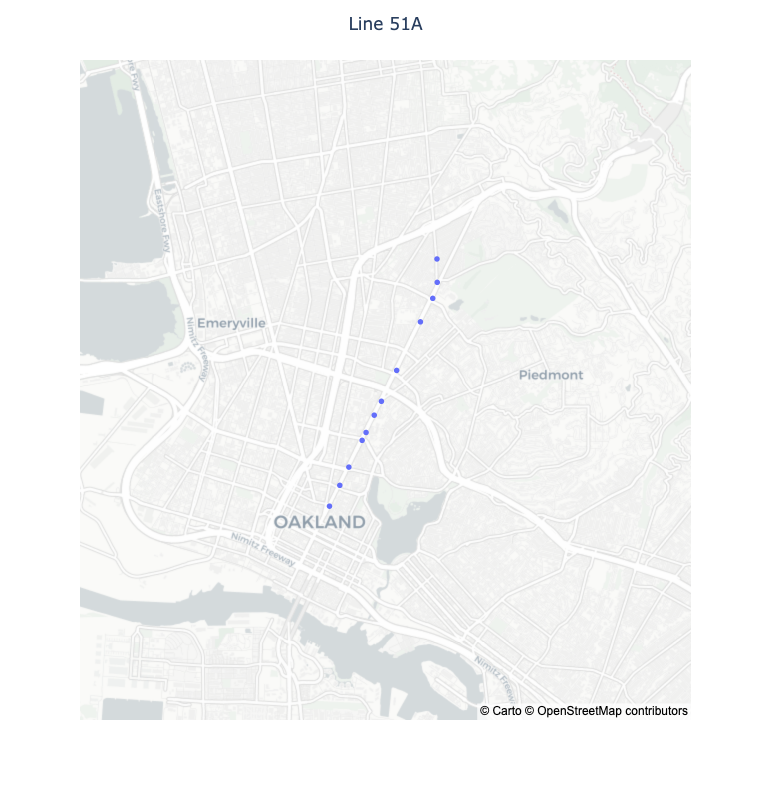

In [24]:
map_51A = generate_map(joined_geom_data_51A, "51A")
map_51A

Through this project, we analyzed various dimensions of routes 19, 20 and 51A. We believed looking at granular-level data such as percentage of seniors, smartphone access, ridership, and community anchor points would help us pinpoint the bus line that would be the best candidate to receive real-time information displays. Based on our findings, we believe line 20 is the best candidate for real-time information displays, for the following reasons:


1) **Lower frequency**: Line 20 boasts frequencies of between 16 to 30 minutes. These are significantly longer headways than the 51A at every 10 to 15 minutes. Even though the 51A experiences slightly more delays than the 20, its shorter headways help compensate for this.


2) **Delay prone**: Line 20's on-time arrival performance, measured by delays exceeding 5 minutes, is often below AC Transit's 72% on-time arrival threshold, according to monthly on-time performance data. This means it is more delay-prone than line 19. Once again, even though the 51A has similar on-time performance, its shorter headways allow it to have more frequent service even accounting for delays.


3) **Runs through areas with high percentage of seniors but lower transit use**: Line 20 runs through parts of Southern Alameda island and in the Dimond District at its eastern terminus, areas with a higher percentage of seniors. Yet, at the same time, census tracts in Alameda also report lower transit use, so the addition of real-time displays could help boost ridership by making the service more convenient and appealing to people who may not be able to or comfortable driving. 


4) **Serves areas with relatively lower smartphone access**: Line 20 runs through parts of Alameda and the Dimond District that have lower smartphone access (between 84 and 91 percent and 76 and 91 percent) compared to the other two lines. Without smartphones, riders are likely to be unable to check apps such as Google Maps or Transit that could inform them when the next bus is coming.


5) **Far from community anchor destinations**: Line 20's stops in Alameda are located particularly far away from community anchor destinations, particularly for healthcare and elderly care. Installing real-time information displays could make the journey to and from these facilities easier, especially for families who may lack or have limited access to private vehicles. 